In [14]:
import pandas as pd
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

In [15]:
# Loading the data
df = pd.read_csv('/content/data.csv')

In [17]:
df.tail(5)

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [18]:
df.rename(columns = {'Month':'ds', '#Passengers':"y"}, inplace = True)
df.head(5)

,ds,y
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      144 non-null    object
 1   y       144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [20]:
df["ds"] = pd.to_datetime(df["ds"])

In [22]:
# Fitting the Prophet model
model = Prophet()
model.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa1z27fw5/x4ahz9k3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa1z27fw5/jyprfncx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32901', 'data', 'file=/tmp/tmpa1z27fw5/x4ahz9k3.json', 'init=/tmp/tmpa1z27fw5/jyprfncx.json', 'output', 'file=/tmp/tmpa1z27fw5/prophet_model82xt59dc/prophet_model-20230103064626.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:46:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:46:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [23]:
# Making predictions for 5 years
# freq: M, D, Y, W, .....
future = model.make_future_dataframe(periods=12 * 5, freq='M')

In [24]:
# Forecasting
forecast = model.predict(future)

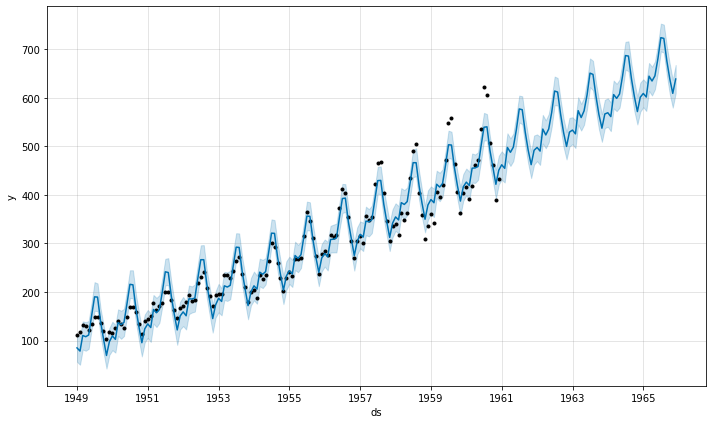

In [25]:
# Plotting the forecasted data
fig1 = model.plot(forecast)

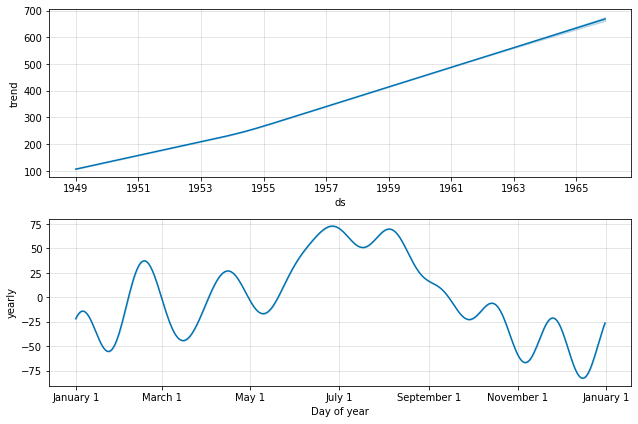

In [26]:
# Plotting components
fig2 = model.plot_components(forecast)